<font size='7'><b>Health Data-Based Predictive Modelling for Identifying Individuals with Alcohol Consumption Patterns

In [31]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Data Cleaning

In [2]:
#Read csv file
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [3]:
#Check for null values
print(f"{df.isnull().sum()}\n")

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64



In [4]:
#Drop unrelated columns
df = df.drop(['SMK_stat_type_cd'], axis=1)

# Exploratory Data Analysis

Label Encoding

In [5]:
# Perform Label Encoding on Sex and DRK_YN

label_encoder = LabelEncoder()

# Fit and transform the specific column
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.tail()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
991341,1,45,175,80,92.1,1.5,1.5,1,1,114,...,46,125,132,15.0,1,1.0,26,36,27,0
991342,1,35,170,75,86.0,1.0,1.5,1,1,119,...,40,84,45,15.8,1,1.1,14,17,15,0
991343,0,40,155,50,68.0,1.0,0.7,1,1,110,...,96,77,157,14.3,1,0.8,30,27,17,1
991344,1,25,175,60,72.0,1.5,1.0,1,1,119,...,38,73,53,14.5,1,0.8,21,14,17,0
991345,1,50,160,70,90.5,1.0,1.5,1,1,133,...,39,153,163,15.8,1,0.9,24,43,36,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991346.0,0.531010,0.499038,0.0,0.0,1.0,1.0,1.0
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0


waistline, LDL_chole, triglyceride, SGOT_AST, SGOT_ALT, gamma_GTP etc. are some of the columns with outliers. The maximum value is unreasonabily higher than the mean.

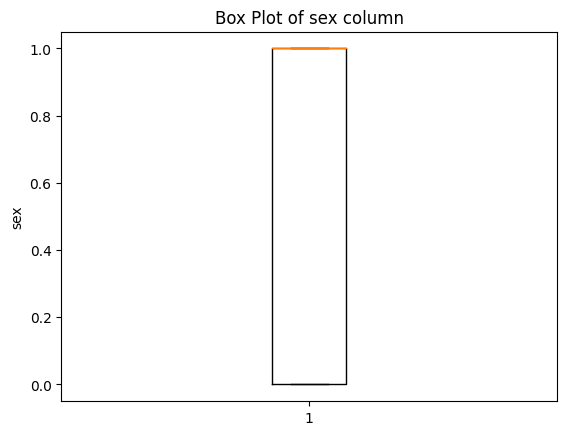

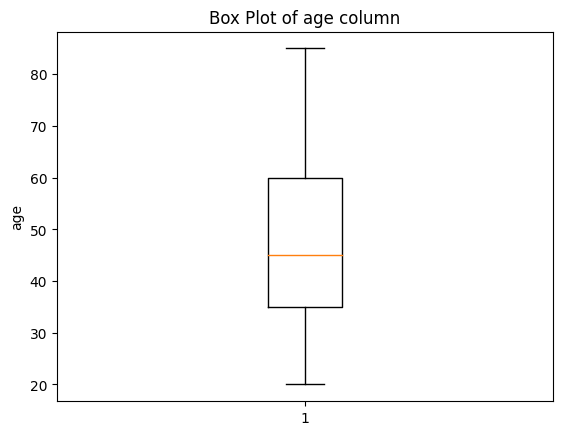

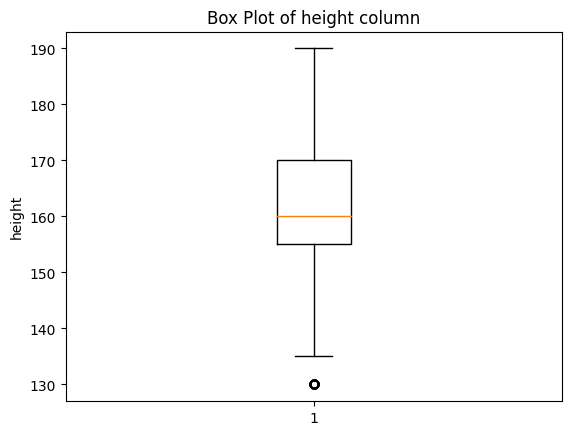

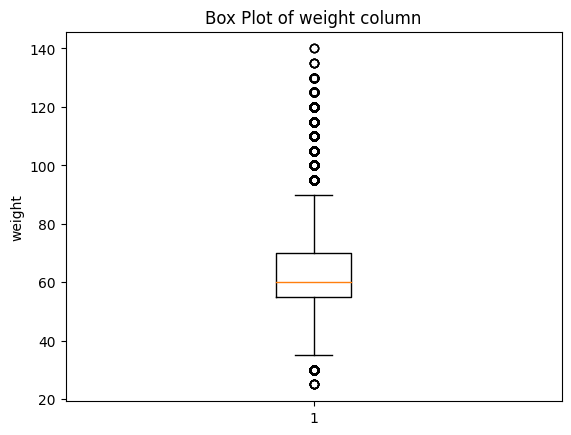

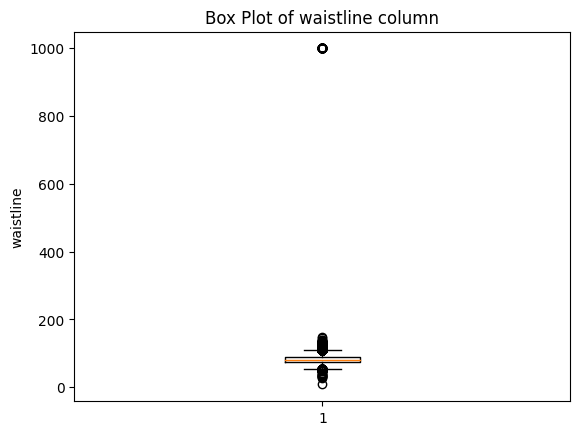

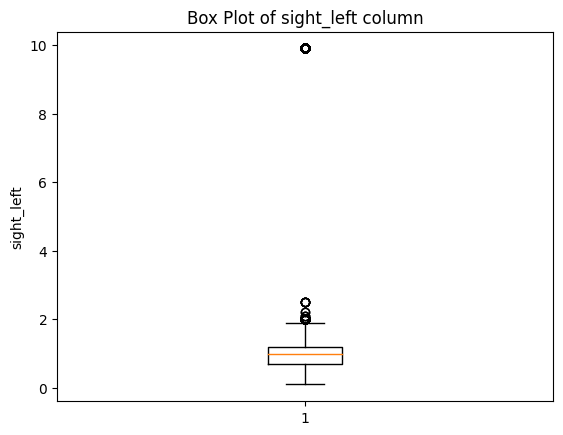

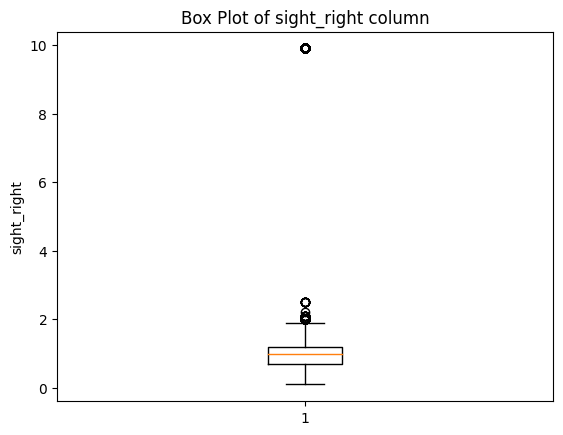

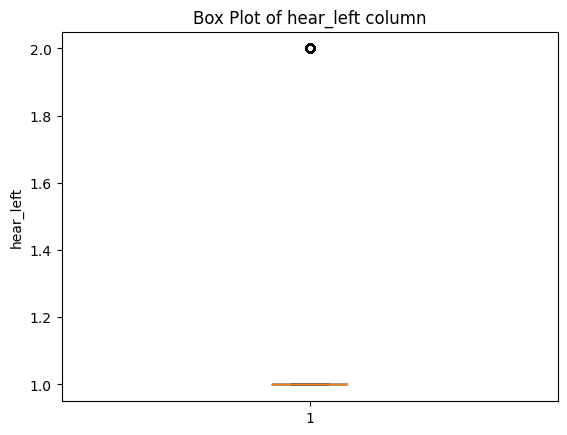

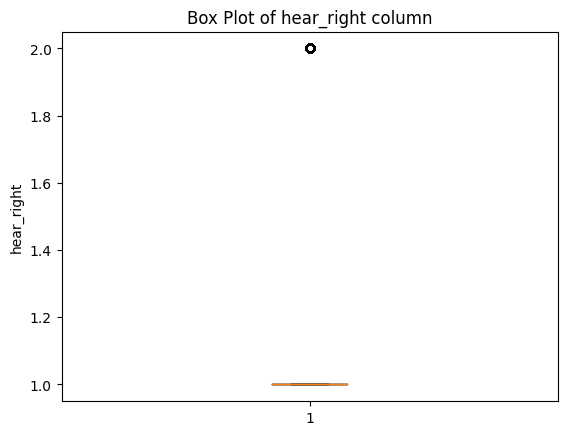

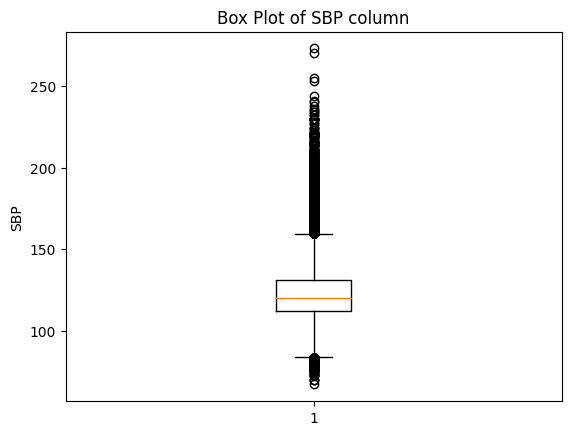

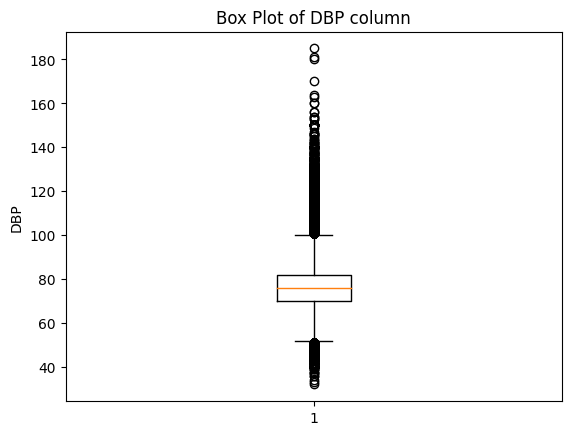

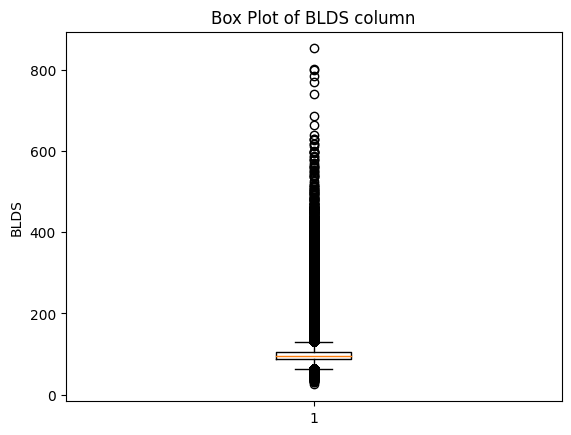

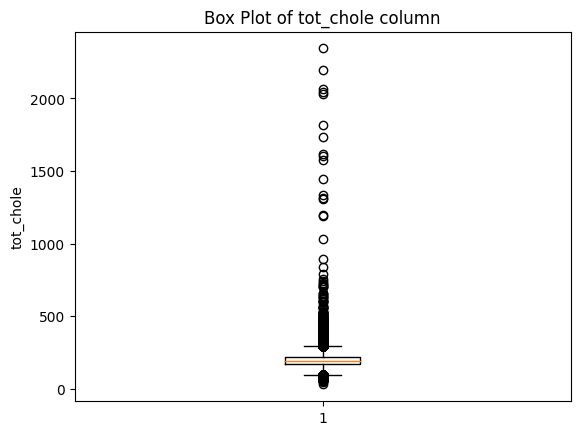

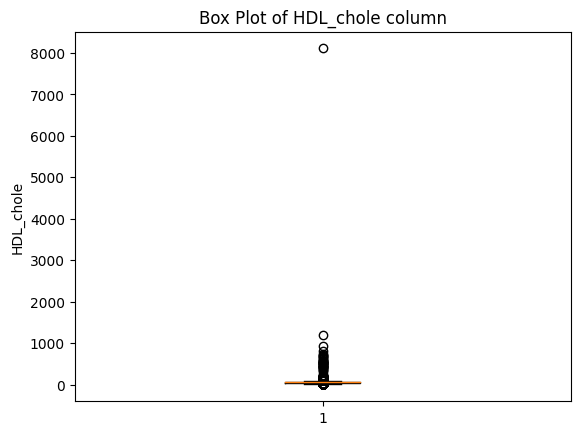

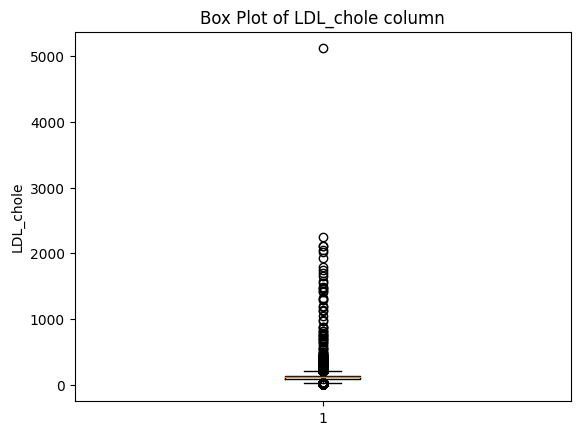

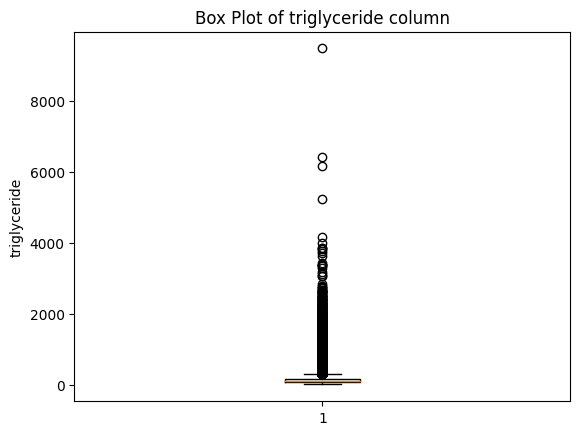

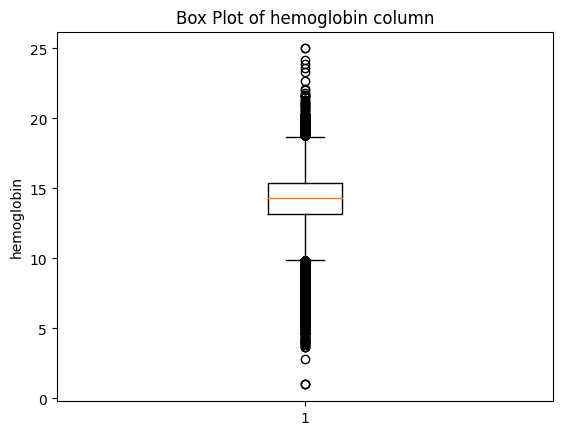

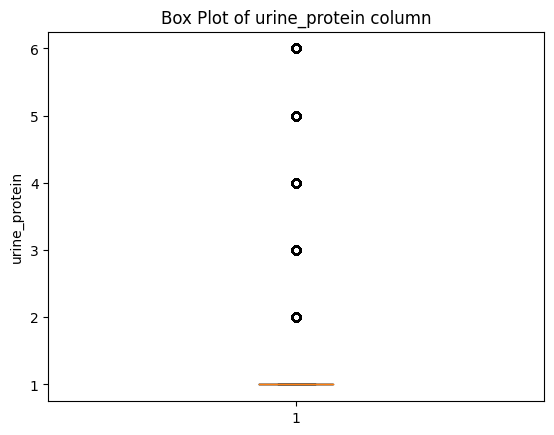

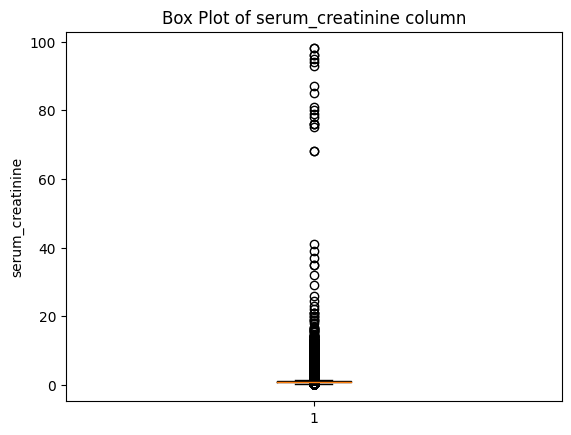

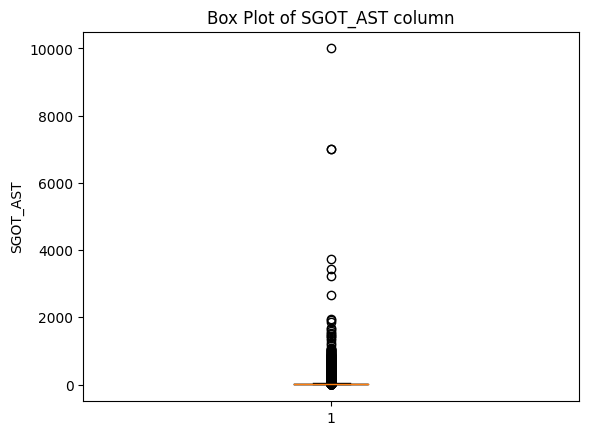

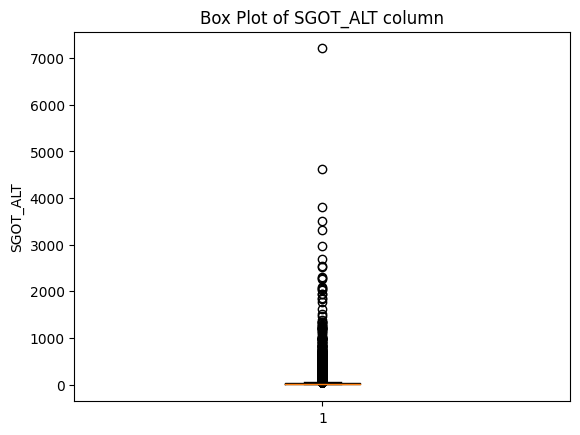

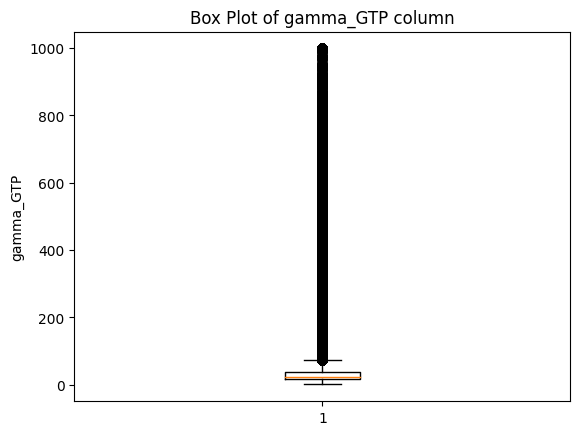

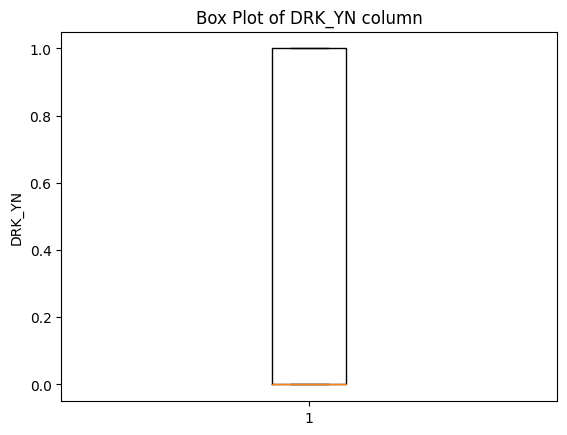

In [7]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(f"Box Plot of {i} column")
    plt.ylabel(i)
    plt.show()

Data Distribution

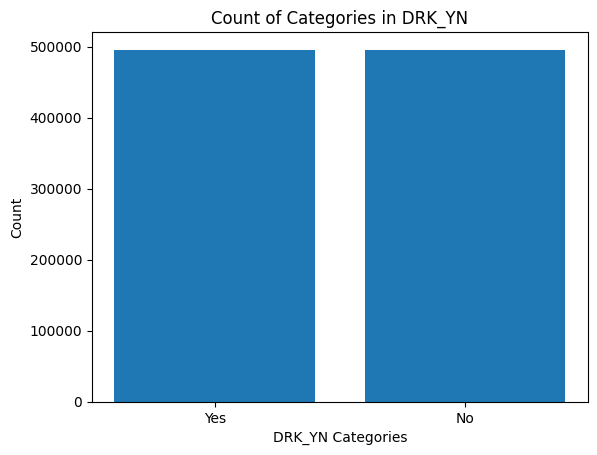

In [8]:
#Check if data is imbalanced
counts = df['DRK_YN'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("DRK_YN Categories")
plt.xticks(counts.index, ["Yes", "No"])
plt.ylabel("Count")
plt.title("Count of Categories in DRK_YN")
plt.show()

Correlation Analysis

In [9]:
corr_matrix = df.corr()
correlation_with_result = corr_matrix['DRK_YN'].sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_with_result, columns=['DRK_YN'])
correlation_df

,DRK_YN
DRK_YN,1.000000
height,0.374566
sex,0.368726
hemoglobin,0.299341
weight,0.264282
gamma_GTP,0.205094
triglyceride,0.104398
DBP,0.100876
waistline,0.092993
sight_left,0.077379


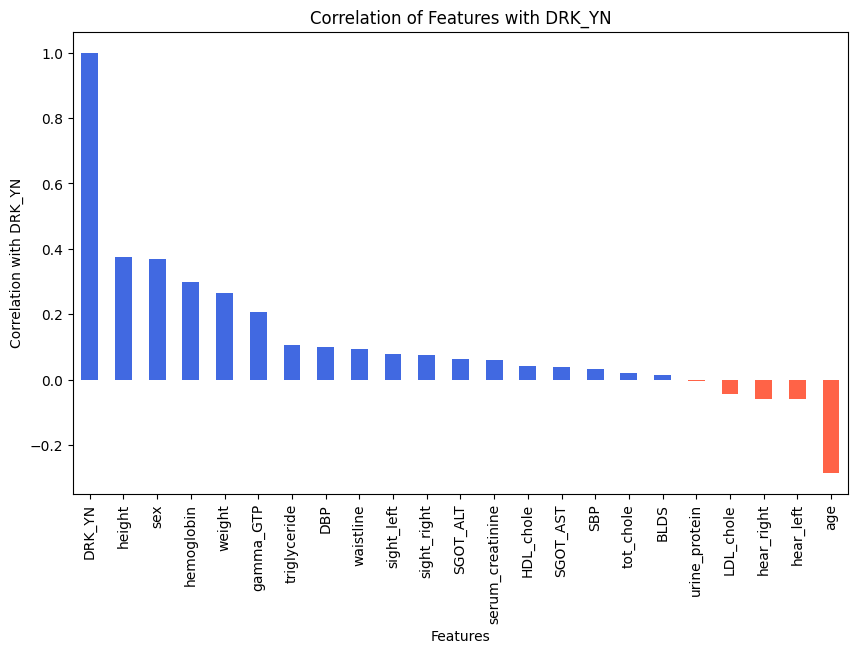

In [10]:
correlation_with_result = df.corr()['DRK_YN'].sort_values(ascending=False)

# Define custom colors for the bars
colors = ['royalblue' if val > 0 else 'tomato' for val in correlation_with_result]

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
correlation_with_result.plot(kind='bar', color=colors)
plt.xlabel('Features')
plt.ylabel('Correlation with DRK_YN')
plt.title('Correlation of Features with DRK_YN')
plt.show()


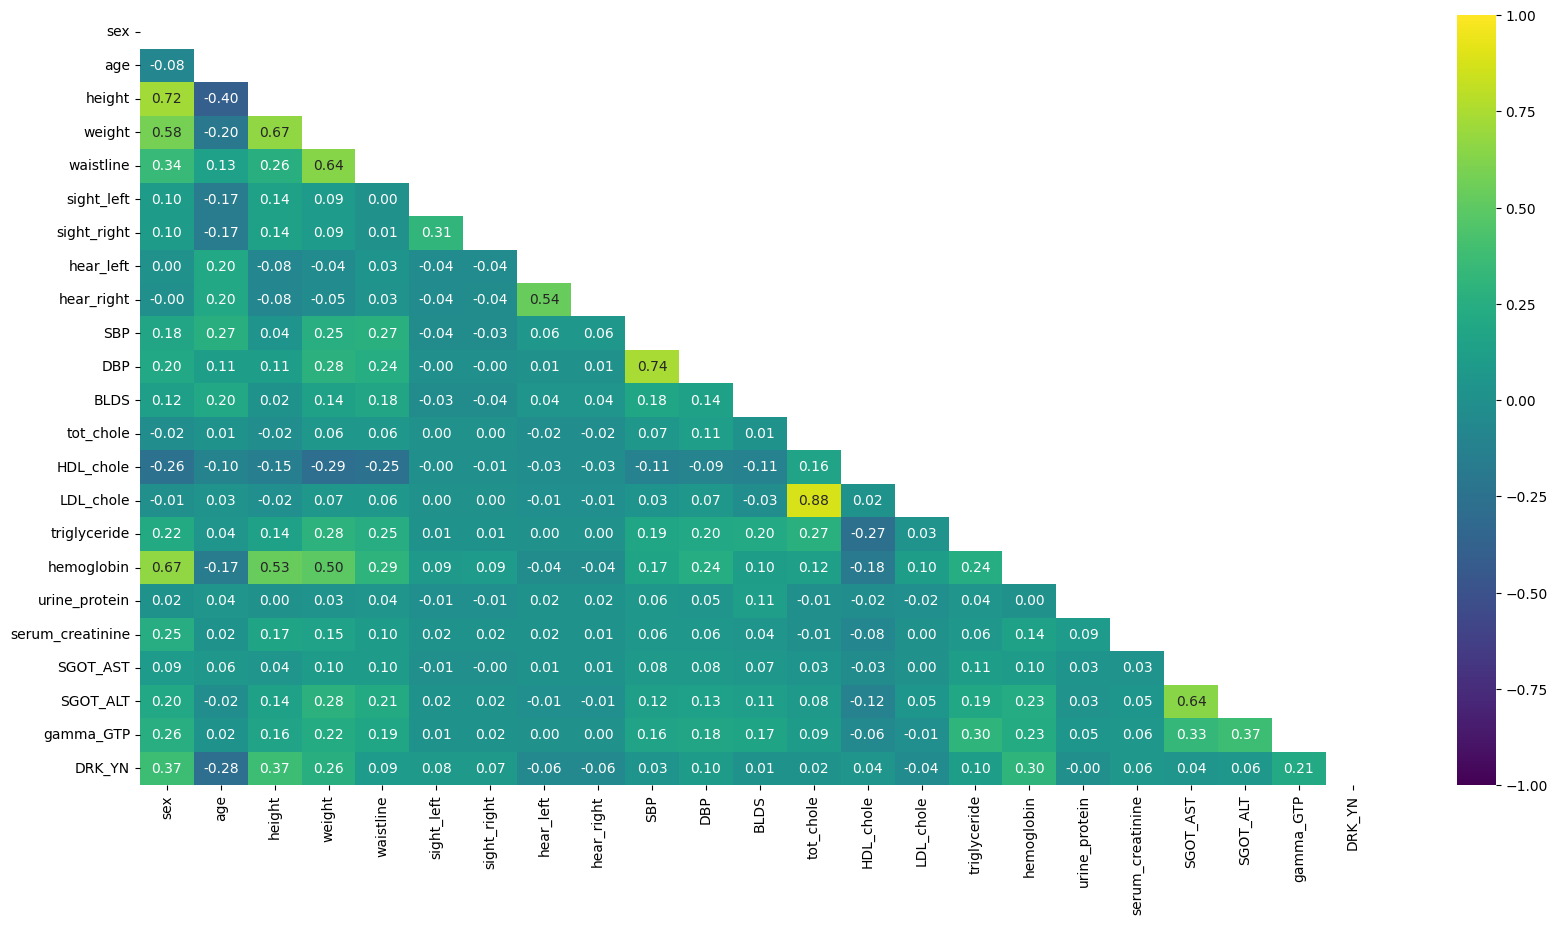

In [11]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", mask=mask, cmap='viridis')
plt.show()

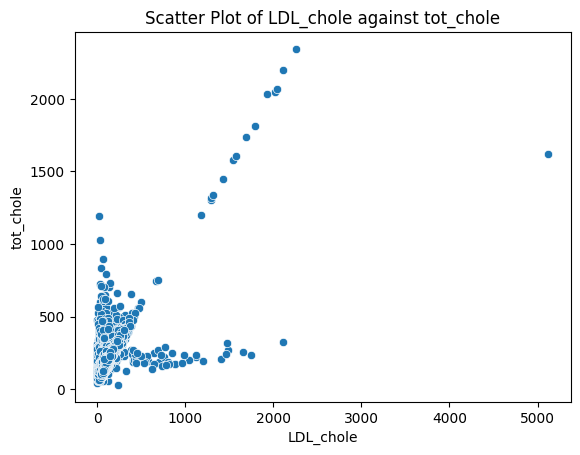

In [12]:
# Create a scatter plot with Seaborn
sns.scatterplot(x=df["LDL_chole"], y=df["tot_chole"])

# Add labels and a title
plt.xlabel('LDL_chole')
plt.ylabel('tot_chole')
plt.title('Scatter Plot of LDL_chole against tot_chole')

# Display the plot
plt.show()


# Data Preprocessing

Outlier Detection and Removal

In [13]:
cols_to_exclude = ["sex","hear_left","hear_right","urine_protein", "DRK_YN"]

for column in df.columns:
    if column not in cols_to_exclude:
        Q1 = df[column].quantile(0.1)
        Q3 = df[column].quantile(0.9)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Normalization

In [14]:
scaler = StandardScaler()
columns_to_norm = [col for col in df.columns if col not in ["DRK_YN"]]
df[columns_to_norm] = scaler.fit_transform(df[columns_to_norm])
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,0.975791,-0.876067,0.857703,0.999881,0.981366,0.134317,0.142318,-0.17824,-0.17496,-0.133441,...,-0.630992,0.377290,-0.421002,1.873414,-0.205739,0.771773,-0.377515,0.930786,0.449420,1
1,0.975791,-1.227436,1.935770,1.408571,0.875641,-0.158800,0.731312,-0.17824,-0.17496,0.565965,...,-0.154918,1.027113,-0.018948,1.039761,-0.205739,0.266801,-0.502033,1.008431,-0.126025,0
2,0.975791,-0.524698,0.318670,0.999881,1.087090,0.720552,1.614803,-0.17824,-0.17496,-0.133441,...,-1.107067,-1.158656,-0.254635,1.039761,-0.205739,0.266801,2.859945,0.697852,1.688839,0
3,0.975791,0.178040,1.396737,1.408571,1.087090,1.599905,0.731312,-0.17824,-0.17496,1.615074,...,1.273306,-0.272533,-0.226907,2.194049,-0.205739,1.276745,0.618627,0.853141,-0.524409,0
4,0.975791,0.178040,0.318670,-0.226190,-0.075881,0.134317,0.731312,-0.17824,-0.17496,1.125489,...,0.253146,0.111453,-0.254635,-0.242781,-0.205739,-0.238171,-0.626550,-0.855043,-0.214555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0.975791,-0.173329,1.396737,1.408571,1.203387,1.599905,1.614803,-0.17824,-0.17496,-0.553085,...,-0.767013,0.347753,0.133555,0.526744,-0.205739,0.771773,0.245074,1.008431,-0.126025,0
991342,0.975791,-0.876067,0.857703,0.999881,0.558467,0.134317,1.614803,-0.17824,-0.17496,-0.203382,...,-1.175077,-0.863281,-1.072608,1.039761,-0.205739,1.276745,-1.249139,-0.466819,-0.657204,0
991343,-1.024809,-0.524698,-0.759397,-1.043570,-1.344578,0.134317,-0.741174,-0.17824,-0.17496,-0.832847,...,2.633518,-1.070043,0.480154,0.077855,-0.205739,-0.238171,0.743144,0.309628,-0.568674,1
991344,0.975791,-1.578805,1.396737,-0.226190,-0.921679,1.599905,0.142318,-0.17824,-0.17496,-0.203382,...,-1.311098,-1.188193,-0.961696,0.206109,-0.205739,-0.238171,-0.377515,-0.699753,-0.568674,0


### PCA

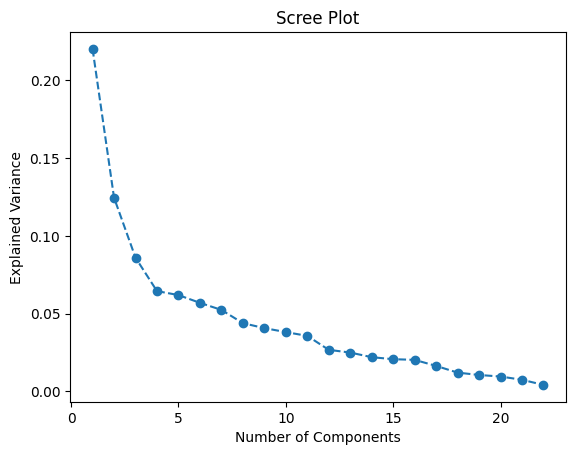

In [15]:
# Standardize the data
# scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

# Create a PCA object and specify the number of components you want to keep
n_components = 22
pca = PCA(n_components=n_components)

# Fit the PCA model to the standardized data and transform the data
data_pca = pca.fit_transform(data_standardized)

# You can also access the principal components and explained variance
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# If needed, you can reconstruct the data from the reduced representation
data_reconstructed = pca.inverse_transform(data_pca)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()


In [16]:
#Remove uncorrelated columns within threshold [-0.04, 0.04]
df_dr = df.drop(['urine_protein', 'BLDS','tot_chole','SGOT_AST','SBP'],axis=1)

X_train_dr,X_test_dr, y_train_dr, y_test_dr = train_test_split(df_dr.iloc[:,:-1],df_dr.iloc[:,-1],test_size=0.3,shuffle=True,random_state =20)

X_train_dr.head()

# Logistic Regression
lr_model = LogisticRegression(C=0.1, max_iter=100)
lr_model.fit(X_train_dr,y_train_dr)
y_pred_LR = lr_model.predict(X_test_dr)

# Model Evaluation
print("accuracy score " , accuracy_score(y_test_dr,y_pred_LR))
print("precision score " , precision_score(y_test_dr,y_pred_LR))
print("recall score " , recall_score(y_test_dr,y_pred_LR))
print("f1 score " , f1_score(y_test_dr,y_pred_LR))

accuracy score  0.7184695083159138
precision score  0.7177385758542072
recall score  0.7022492311112758
f1 score  0.7099094239543298


Train-Test Split

In [17]:
X_train,X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,shuffle=True,random_state =20)

X_train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
793554,0.975791,1.583516,0.318670,0.182501,-0.075881,0.134317,-0.152179,-0.17824,-0.17496,1.824895,...,-0.237507,-1.379109,0.377290,-0.115996,-0.178654,-0.205739,0.771773,-1.249139,-0.389174,-0.701469
461604,-1.024809,0.529409,-1.298431,-1.043570,-1.344578,-0.158800,1.614803,-0.17824,-0.17496,-0.273322,...,-0.696547,1.545348,-1.070043,-0.850785,-0.755798,-0.205739,0.266801,-0.003962,-0.699753,-0.701469
667724,-1.024809,-0.173329,-0.759397,-0.226190,-1.027403,-0.158800,0.142318,-0.17824,-0.17496,-0.832847,...,2.003687,2.837550,1.233875,-0.698281,-0.819925,-0.205739,-0.238171,0.369591,-0.622108,-0.745734
206946,0.975791,-1.578805,0.318670,1.817261,1.298540,1.599905,3.087289,-0.17824,-0.17496,-0.972728,...,-1.155586,-1.719162,-0.538370,0.022644,1.168016,-0.205739,0.771773,0.245074,1.474299,-0.480144
383701,0.975791,-0.876067,0.857703,0.182501,0.769916,0.720552,-0.152179,-0.17824,-0.17496,0.426083,...,-0.210505,-0.086907,-0.065771,-0.323955,1.232143,-0.205739,-0.238171,1.988321,-0.078595,0.493685


In [18]:
total_samples = len(df)
train_samples = len(X_train)
test_samples = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_samples / total_samples:.2%} of total)")
print(f"Testing samples: {test_samples} ({test_samples / total_samples:.2%} of total)")

Total samples: 916916
Training samples: 641841 (70.00% of total)
Testing samples: 275075 (30.00% of total)


# Modelling

## Logistic Regression Model

In [20]:
# Logistic Regression
lr_model = LogisticRegression(C=10, max_iter=100)
lr_model.fit(X_train,y_train)
y_pred_LR = lr_model.predict(X_test)

# Model Evaluation
print("accuracy score " , accuracy_score(y_test,y_pred_LR))
print("precision score " , precision_score(y_test,y_pred_LR))
print("recall score " , recall_score(y_test,y_pred_LR))
print("f1 score " , f1_score(y_test,y_pred_LR))

accuracy score  0.7202981005180406
precision score  0.720095330621167
recall score  0.7031089042872494
f1 score  0.7115007480679598


## Decision Tree Model

In [21]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = clf.predict(X_test)

print("accuracy score " , accuracy_score(y_test,y_pred_dt))
print("precision score " , precision_score(y_test,y_pred_dt))
print("recall score " , recall_score(y_test,y_pred_dt))
print("f1 score " , f1_score(y_test,y_pred_dt))

accuracy score  0.7188366809052077
precision score  0.7074681921009783
recall score  0.7277429873642866
f1 score  0.7174623817752077


## Random Forest Model

In [22]:
# Create a RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rfclf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rfclf.predict(X_test)

print("accuracy score " , accuracy_score(y_test,y_pred_rf))
print("precision score " , precision_score(y_test,y_pred_rf))
print("recall score " , recall_score(y_test,y_pred_rf))
print("f1 score " , f1_score(y_test,y_pred_rf))

accuracy score  0.7245224029810052
precision score  0.7171637079130141
recall score  0.723918923926335
f1 score  0.7205254830512537


## AdaBoost Model

In [23]:
# Create an AdaBoostClassifier with a base estimator (e.g., DecisionTreeClassifier)
estimator = DecisionTreeClassifier(max_depth=5)
ab_clf = AdaBoostClassifier(base_estimator=estimator, n_estimators=75, learning_rate=0.1, random_state=42)

# Fit the model on the training data
ab_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ab = ab_clf.predict(X_test)

print("accuracy score " , accuracy_score(y_test,y_pred_ab))
print("precision score " , precision_score(y_test,y_pred_ab))
print("recall score " , recall_score(y_test,y_pred_ab))
print("f1 score " , f1_score(y_test,y_pred_ab))

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy score  0.7281505044078888
precision score  0.7171853563434183
recall score  0.7360803349760996
f1 score  0.7265100118862576


## LGBM Model

In [24]:
# Create and train an LGBMClassifier model
lgbm_clf = LGBMClassifier(n_estimators=225, learning_rate=0.01)
lgbm_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lgbm = lgbm_clf.predict(X_test)

print("accuracy score " , accuracy_score(y_test,y_pred_lgbm))
print("precision score " , precision_score(y_test,y_pred_lgbm))
print("recall score " , recall_score(y_test,y_pred_lgbm))
print("f1 score " , f1_score(y_test,y_pred_lgbm))

[LightGBM] [Info] Number of positive: 313968, number of negative: 327873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 641841, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489168 -> initscore=-0.043335
[LightGBM] [Info] Start training from score -0.043335
accuracy score  0.7297028083250022
precision score  0.7214242377725635
recall score  0.7314114203134843
f1 score  0.7263835017553673


## XGBoost Model

In [46]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("accuracy score " , accuracy_score(y_test, y_pred_xgb))
print("precision score " , precision_score(y_test, y_pred_xgb))
print("recall score " , recall_score(y_test, y_pred_xgb))
print("f1 score " , f1_score(y_test, y_pred_xgb))

# Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
# Test Accuracy with Best Model: 0.7302553848950286

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

## CatBoost Model

In [25]:
# Initialize the CatBoostClassifier
cb_clf = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.07, loss_function='Logloss')

# Fit the model on the training data
cb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_cb = cb_clf.predict(X_test)

print("accuracy score " , accuracy_score(y_test,y_pred_cb))
print("precision score " , precision_score(y_test,y_pred_cb))
print("recall score " , recall_score(y_test,y_pred_cb))
print("f1 score " , f1_score(y_test,y_pred_cb))

0:	learn: 0.6720716	total: 200ms	remaining: 1m 39s
1:	learn: 0.6546546	total: 255ms	remaining: 1m 3s
2:	learn: 0.6392979	total: 307ms	remaining: 50.9s
3:	learn: 0.6262755	total: 356ms	remaining: 44.1s
4:	learn: 0.6154539	total: 404ms	remaining: 40s
5:	learn: 0.6058989	total: 456ms	remaining: 37.5s
6:	learn: 0.5978381	total: 508ms	remaining: 35.8s
7:	learn: 0.5909459	total: 556ms	remaining: 34.2s
8:	learn: 0.5854431	total: 606ms	remaining: 33.1s
9:	learn: 0.5801084	total: 656ms	remaining: 32.1s
10:	learn: 0.5756930	total: 704ms	remaining: 31.3s
11:	learn: 0.5719243	total: 753ms	remaining: 30.6s
12:	learn: 0.5685478	total: 803ms	remaining: 30.1s
13:	learn: 0.5656870	total: 860ms	remaining: 29.8s
14:	learn: 0.5631645	total: 912ms	remaining: 29.5s
15:	learn: 0.5607540	total: 970ms	remaining: 29.3s
16:	learn: 0.5587643	total: 1.02s	remaining: 29.1s
17:	learn: 0.5569304	total: 1.08s	remaining: 28.8s
18:	learn: 0.5553215	total: 1.12s	remaining: 28.4s
19:	learn: 0.5540256	total: 1.17s	remainin

In [26]:
# Feature importance
cb_clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,sex,24.764356
1,age,17.625347
2,gamma_GTP,15.634139
3,HDL_chole,8.617434
4,SGOT_ALT,7.977562
5,SGOT_AST,3.468133
6,height,2.679770
7,triglyceride,2.593932
8,hemoglobin,2.320245
9,LDL_chole,2.312152


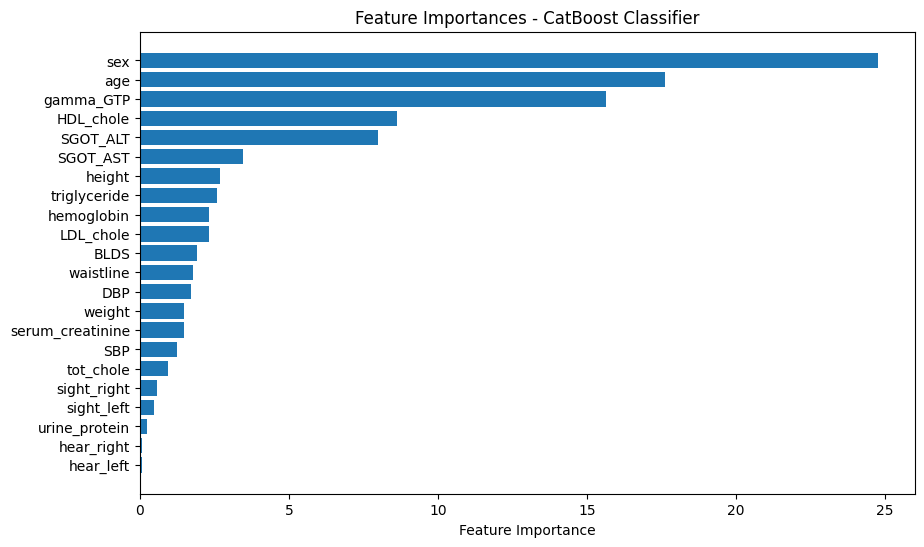

In [27]:
feature_importance = cb_clf.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - CatBoost Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

In [28]:
print(classification_report(cb_clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73    138659
           1       0.73      0.72      0.73    136416

    accuracy                           0.73    275075
   macro avg       0.73      0.73      0.73    275075
weighted avg       0.73      0.73      0.73    275075



## ROC Curve

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 0.6720716	total: 47.5ms	remaining: 23.7s
1:	learn: 0.6546546	total: 102ms	remaining: 25.4s
2:	learn: 0.6392979	total: 153ms	remaining: 25.4s
3:	learn: 0.6262755	total: 200ms	remaining: 24.8s
4:	learn: 0.6154539	total: 248ms	remaining: 24.6s
5:	learn: 0.6058989	total: 298ms	remaining: 24.6s
6:	learn: 0.5978381	total: 350ms	remaining: 24.7s
7:	learn: 0.5909459	total: 396ms	remaining: 24.3s
8:	learn: 0.5854431	total: 445ms	remaining: 24.3s
9:	learn: 0.5801084	total: 494ms	remaining: 24.2s
10:	learn: 0.5756930	total: 540ms	remaining: 24s
11:	learn: 0.5719243	total: 587ms	remaining: 23.9s
12:	learn: 0.5685478	total: 636ms	remaining: 23.8s
13:	learn: 0.5656870	total: 690ms	remaining: 23.9s
14:	learn: 0.5631645	total: 740ms	remaining: 23.9s
15:	learn: 0.5607540	total: 792ms	remaining: 23.9s
16:	learn: 0.5587643	total: 841ms	remaining: 23.9s
17:	learn: 0.5569304	total: 894ms	remaining: 23.9s
18:	learn: 0.5553215	total: 945ms	remaining: 23.9s
19:	learn: 0.5540256	total: 990ms	remainin

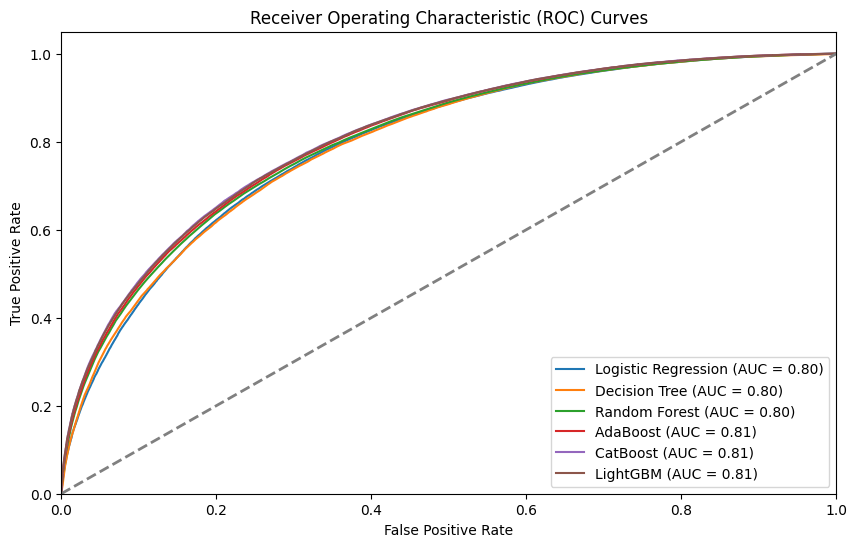

In [29]:
# Initialize the classifiers
classifiers = {
    'Logistic Regression': lr_model,
    'Decision Tree': clf,
    'Random Forest': rfclf,
    'AdaBoost': ab_clf,
    'CatBoost': cb_clf,
    'LightGBM': lgbm_clf
}

# Create an ROC curve for each classifier
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (50% AUC)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Cross Validation


In [33]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

lr_scores = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='accuracy')
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=kfold, scoring='accuracy')
dec_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
randomf_scores = cross_val_score(rfclf, X_train, y_train, cv=kfold, scoring='accuracy')
ada_scores = cross_val_score(ab_clf, X_train, y_train, cv=kfold, scoring='accuracy')
cat_scores = cross_val_score(cb_clf, X_train, y_train, cv=kfold, scoring='accuracy')
lgbm_scores = cross_val_score(lgbm_clf, X_train, y_train, cv=kfold, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy: ", lr_scores.mean())
print("Decision Tree Cross-Validation Accuracy: ", dec_scores.mean())
print("random Forest Cross-Validation Accuracy: ", randomf_scores.mean())
print("AdaBoost Cross-Validation Accuracy: ", ada_scores.mean())
print("Cat Cross-Validation Accuracy: ", cat_scores.mean())
print("LGBM Cross-Validation Accuracy: ", lgbm_scores.mean())

[LightGBM] [Info] Number of positive: 282630, number of negative: 295026
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 577656, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489270 -> initscore=-0.042925
[LightGBM] [Info] Start training from score -0.042925
[LightGBM] [Info] Number of positive: 282620, number of negative: 295037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 577657, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489252 -> initscore=-0.042

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\en

0:	learn: 0.6722876	total: 70.9ms	remaining: 35.4s
1:	learn: 0.6547617	total: 118ms	remaining: 29.3s
2:	learn: 0.6395385	total: 163ms	remaining: 27.1s
3:	learn: 0.6269130	total: 210ms	remaining: 26.1s
4:	learn: 0.6160774	total: 256ms	remaining: 25.3s
5:	learn: 0.6069176	total: 304ms	remaining: 25s
6:	learn: 0.5987668	total: 354ms	remaining: 25s
7:	learn: 0.5920448	total: 401ms	remaining: 24.7s
8:	learn: 0.5860048	total: 449ms	remaining: 24.5s
9:	learn: 0.5810338	total: 506ms	remaining: 24.8s
10:	learn: 0.5762764	total: 558ms	remaining: 24.8s
11:	learn: 0.5723225	total: 604ms	remaining: 24.6s
12:	learn: 0.5687002	total: 651ms	remaining: 24.4s
13:	learn: 0.5661701	total: 698ms	remaining: 24.2s
14:	learn: 0.5633986	total: 744ms	remaining: 24s
15:	learn: 0.5610307	total: 802ms	remaining: 24.3s
16:	learn: 0.5590394	total: 858ms	remaining: 24.4s
17:	learn: 0.5572406	total: 905ms	remaining: 24.2s
18:	learn: 0.5556539	total: 953ms	remaining: 24.1s
19:	learn: 0.5540157	total: 1.01s	remaining: 2

## Majority Voting 1

In [34]:
# Create Majority Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rfclf),
    ('ab', ab_clf),
    ('cb', cb_clf),
    ('lgbm', lgbm_clf)
], voting='hard')

# Train Majority Voting classifier
voting_clf.fit(X_train, y_train)

# Perform prediction
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the performance of Majority Voting classifier
accuracy = accuracy_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 0.6720716	total: 49.5ms	remaining: 24.7s
1:	learn: 0.6546546	total: 103ms	remaining: 25.6s
2:	learn: 0.6392979	total: 156ms	remaining: 25.9s
3:	learn: 0.6262755	total: 206ms	remaining: 25.5s
4:	learn: 0.6154539	total: 255ms	remaining: 25.3s
5:	learn: 0.6058989	total: 307ms	remaining: 25.3s
6:	learn: 0.5978381	total: 357ms	remaining: 25.1s
7:	learn: 0.5909459	total: 403ms	remaining: 24.8s
8:	learn: 0.5854431	total: 452ms	remaining: 24.7s
9:	learn: 0.5801084	total: 503ms	remaining: 24.6s
10:	learn: 0.5756930	total: 550ms	remaining: 24.4s
11:	learn: 0.5719243	total: 596ms	remaining: 24.2s
12:	learn: 0.5685478	total: 645ms	remaining: 24.1s
13:	learn: 0.5656870	total: 700ms	remaining: 24.3s
14:	learn: 0.5631645	total: 750ms	remaining: 24.2s
15:	learn: 0.5607540	total: 804ms	remaining: 24.3s
16:	learn: 0.5587643	total: 853ms	remaining: 24.2s
17:	learn: 0.5569304	total: 904ms	remaining: 24.2s
18:	learn: 0.5553215	total: 953ms	remaining: 24.1s
19:	learn: 0.5540256	total: 998ms	remain

## Majority Voting 2

In [35]:
# Create Majority Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('ab', ab_clf),
    ('cb', cb_clf),
    ('lgbm', lgbm_clf)
], voting='hard')

# Train Majority Voting classifier
voting_clf.fit(X_train, y_train)

# Perform prediction
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the performance of Majority Voting classifier
accuracy = accuracy_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 0.6720716	total: 51.9ms	remaining: 25.9s
1:	learn: 0.6546546	total: 104ms	remaining: 25.9s
2:	learn: 0.6392979	total: 154ms	remaining: 25.5s
3:	learn: 0.6262755	total: 201ms	remaining: 25s
4:	learn: 0.6154539	total: 251ms	remaining: 24.9s
5:	learn: 0.6058989	total: 302ms	remaining: 24.9s
6:	learn: 0.5978381	total: 351ms	remaining: 24.7s
7:	learn: 0.5909459	total: 397ms	remaining: 24.4s
8:	learn: 0.5854431	total: 448ms	remaining: 24.4s
9:	learn: 0.5801084	total: 503ms	remaining: 24.7s
10:	learn: 0.5756930	total: 552ms	remaining: 24.5s
11:	learn: 0.5719243	total: 602ms	remaining: 24.5s
12:	learn: 0.5685478	total: 652ms	remaining: 24.4s
13:	learn: 0.5656870	total: 707ms	remaining: 24.5s
14:	learn: 0.5631645	total: 758ms	remaining: 24.5s
15:	learn: 0.5607540	total: 812ms	remaining: 24.6s
16:	learn: 0.5587643	total: 860ms	remaining: 24.4s
17:	learn: 0.5569304	total: 915ms	remaining: 24.5s
18:	learn: 0.5553215	total: 963ms	remaining: 24.4s
19:	learn: 0.5540256	total: 1.02s	remainin

# Hyperparameter Tuning

## Logistic Regression

In [36]:
# Define a simplified grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10.0, 'max_iter': 100}


In [37]:
# Use the best model for predictions
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.7202835590293556


## Decision Tree

In [38]:
# Define a simplified grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", best_params)
print("Best Model: ",best_model)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 209312, number of negative: 218582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 427894, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489168 -> initscore=-0.043335
[LightGBM] [Info] Start training from score -0.043335
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_

In [39]:
# Use the best model for predictions
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Best Model:", accuracy)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy of the Best Model: 0.7296082886485504


## Random Forest

In [40]:
# Create a random forest classifier
rfclf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid, including different n_estimators values
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter search using training data
grid_search.fit(X_train, y_train)

# Output the best hyperparameter
best_n_estimators = grid_search.best_params_['n_estimators']

print("Best n_estimators:", best_n_estimators)

# Train the final model using the best hyperparameter
final_rfclf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_rfclf.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred_rf = final_rfclf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred_rf))
print("precision score: ", precision_score(y_test, y_pred_rf))
print("recall score: ", recall_score(y_test, y_pred_rf))
print("f1 score: ", f1_score(y_test, y_pred_rf))

Best n_estimators: 200
accuracy score:  0.7245224029810052
precision score:  0.7171637079130141
recall score:  0.723918923926335
f1 score:  0.7205254830512537


## AdaBoost

In [41]:
param_grid = {
    'base_estimator__max_depth': [5, 10, 15],  # Adjust the max depth of the base estimator
    'n_estimators': [25, 50, 75],  # Number of boosting rounds
    'learning_rate': [0.1, 0.5, 1.0]  # Learning rate
}
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(base_estimator=estimator, random_state=42),
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores for parallel processing
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
y_pred_best = best_estimator.predict(X_test)

print("Best hyperparameters:", best_params)
print("accuracy score " , accuracy_score(y_test,y_pred_best))
print("precision score " , precision_score(y_test,y_pred_best))
print("recall score " , recall_score(y_test,y_pred_best))
print("f1 score " , f1_score(y_test,y_pred_best))

c:\Users\Desmond Ku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 75}
accuracy score  0.7281505044078888
precision score  0.7171853563434183
recall score  0.7360803349760996
f1 score  0.7265100118862576


## LGBM Model

In [42]:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [175, 200, 225],
    'learning_rate': [0.075, 0.1, 0.125],
}

# Create a GridSearchCV object
lgbm_grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
lgbm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = lgbm_grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model and its prediction
best_model = lgbm_grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 209312, number of negative: 218582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 427894, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489168 -> initscore=-0.043335
[LightGBM] [Info] Start training from score -0.043335
[LightGBM] [Info] Number of positive: 209312, number of negative: 218582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 427894, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489168 -> initscore=-0.043

## XGBooost

In [43]:
xgb = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Test Accuracy with Best Model: 0.7302553848950286


## CatBoost

In [44]:
# Create CatBoostClassifier
clf = CatBoostClassifier()

# Define the hyperparameter search space
param_grid = {
    'iterations': [100, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.07]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)

# Perform a hyper-parametric search
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

0:	learn: 0.6904787	total: 31.8ms	remaining: 3.15s
1:	learn: 0.6878482	total: 52.7ms	remaining: 2.58s
2:	learn: 0.6853677	total: 76.4ms	remaining: 2.47s
3:	learn: 0.6828432	total: 97.6ms	remaining: 2.34s
4:	learn: 0.6804253	total: 120ms	remaining: 2.27s
5:	learn: 0.6780014	total: 141ms	remaining: 2.21s
6:	learn: 0.6756200	total: 163ms	remaining: 2.16s
7:	learn: 0.6733363	total: 187ms	remaining: 2.15s
8:	learn: 0.6710988	total: 209ms	remaining: 2.11s
9:	learn: 0.6689266	total: 232ms	remaining: 2.09s
10:	learn: 0.6667962	total: 258ms	remaining: 2.09s
11:	learn: 0.6646687	total: 280ms	remaining: 2.05s
12:	learn: 0.6626414	total: 303ms	remaining: 2.03s
13:	learn: 0.6606803	total: 328ms	remaining: 2.01s
14:	learn: 0.6587532	total: 351ms	remaining: 1.99s
15:	learn: 0.6567965	total: 374ms	remaining: 1.96s
16:	learn: 0.6549207	total: 397ms	remaining: 1.94s
17:	learn: 0.6530176	total: 422ms	remaining: 1.92s
18:	learn: 0.6511844	total: 443ms	remaining: 1.89s
19:	learn: 0.6494572	total: 468ms	rem